In [11]:
import pandas as pd
# step 1
DataFrame = pd.read_csv('/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv')
# step 2
row, col = DataFrame.shape
print(f"# of columns: {col}")
print(f"# of rows: {row}")
# step 3
stat=DataFrame.describe()
print(stat)
# step 4
MissingValues = DataFrame.isnull().sum().sum()
print("# of missing values in the dataset:")
print(MissingValues)
# step 5
DuplicateValues = DataFrame.duplicated().sum()
print(f"# of duplicate values in the dataset: {DuplicateValues}")

# of columns: 35
# of rows: 1470
               Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   


In [4]:
def DataCleaning(DataFrame, TargetColumn='Attrition'):
    # step 1
    for column in DataFrame.columns:
        if DataFrame[column].isnull().sum() > 0:  # missing values checking
            if pd.api.types.is_numeric_dtype(DataFrame[column]):  # numeric column checking and columnwise mean is used
                MeanValue = DataFrame[column].mean()
                DataFrame[column].fillna(MeanValue, inplace=True)
            else:  # for nun numberic column, columnwise mode is used
                ModeValue = DataFrame[column].mode()[0]
                DataFrame[column].fillna(ModeValue, inplace=True)
    
    # step 2
    DataFrame.drop_duplicates(inplace=True)
    
    # step 3
    DataFrame.dropna(subset=[TargetColumn], inplace=True)
    
    return DataFrame

CleanedData = DataCleaning(DataFrame)

print(f"# of rows after cleaning: {CleanedData.shape[0]}")
print(f"# of columns after cleaning: {CleanedData.shape[1]}")

# of rows after cleaning: 1470
# of columns after cleaning: 35


In [5]:
Features = CleanedData.drop(columns=['Attrition'])
Labels = CleanedData['Attrition']
print(f"shape of features: {Features.shape}")
print(f"shape of labels: {Labels.shape}")

shape of features: (1470, 34)
shape of labels: (1470,)


In [6]:
# step 1 
# convertion of text type into categorical type 
CategoricalColumns = CleanedData.select_dtypes(include=['object']).columns

# step 2 
# performing one hot encoding
# initialize a list to store columns for label encoding
LevelEncodingColumns = []

# separating features into binary and categorical for different encoding strategies
for column in CategoricalColumns:
    UniqueValues = CleanedData[column].nunique()
    
    if UniqueValues == 2:  # performing label encoding for binary columns
        LevelEncodingColumns.append(column)
    else:  # performing one hot encoding for columns with more than 2 unique values
        CleanedData = pd.get_dummies(CleanedData, columns=[column], drop_first=True)

# step 3
# applying label encoding for binary columns
from sklearn.preprocessing import LabelEncoder

LabelEncoder = LabelEncoder()
for column in LevelEncodingColumns:
    CleanedData[column] = LabelEncoder.fit_transform(CleanedData[column])

# reassigning the features and labels
Features = CleanedData.drop(columns=['Attrition'])
Labels = CleanedData['Attrition']

print(f"shape of features after encoding: {Features.shape}")
print(f"shape of labels after encoding {Labels.shape}")

shape of features after encoding: (1470, 47)
shape of labels after encoding (1470,)


In [7]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# defining a function to scale the dataset based on my preference
def ScaleFeatures(DataFrame, ScalingMethod='standard'):
    # identifing numeric columns, excluding one hot encoded column
    NumericColumns = DataFrame.select_dtypes(include=['float64', 'int64']).columns
    
    # creating copies of the dataframe to apply different scalings
    ScaledDataFrame = DataFrame.copy()
    
    # initializing the scaler based on the given scaling method
    if ScalingMethod == 'standard':
        scaler = StandardScaler()
    else:
        scaler = MinMaxScaler()
    
    # applying scaling to the numeric columns excluding one hot encoded column
    ScaledDataFrame[NumericColumns] = scaler.fit_transform(DataFrame[NumericColumns])
    
    return ScaledDataFrame

# applying standard scaling
StandardScaledDataframe = ScaleFeatures(Features, ScalingMethod='standard')
print("First 5 rows of the dataset after Standard Scaling:")
print(StandardScaledDataframe.head())

# applying min-max scaling
MinmaxScaledDataframe = ScaleFeatures(Features, ScalingMethod='minmax')
print("First 5 rows of the dataset after Min-Max Scaling:")
print(MinmaxScaledDataframe.head())


First 5 rows of the dataset after Standard Scaling:
        Age  DailyRate  DistanceFromHome  Education  EmployeeCount  \
0  0.446350   0.742527         -1.010909  -0.891688            0.0   
1  1.322365  -1.297775         -0.147150  -1.868426            0.0   
2  0.008343   1.414363         -0.887515  -0.891688            0.0   
3 -0.429664   1.461466         -0.764121   1.061787            0.0   
4 -1.086676  -0.524295         -0.887515  -1.868426            0.0   

   EmployeeNumber  EnvironmentSatisfaction    Gender  HourlyRate  \
0       -1.701283                -0.660531 -1.224745    1.383138   
1       -1.699621                 0.254625  0.816497   -0.240677   
2       -1.696298                 1.169781  0.816497    1.284725   
3       -1.694636                 1.169781 -1.224745   -0.486709   
4       -1.691313                -1.575686  0.816497   -1.274014   

   JobInvolvement  ...  JobRole_Human Resources  \
0        0.379672  ...                    False   
1       -1.02616

/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


correlation of each feature with the target variable:
Age                                 -0.159205
DailyRate                           -0.056652
DistanceFromHome                     0.077924
Education                           -0.031373
EmployeeCount                             NaN
EmployeeNumber                      -0.010577
EnvironmentSatisfaction             -0.103369
Gender                               0.029453
HourlyRate                          -0.006846
JobInvolvement                      -0.130016
JobLevel                            -0.169105
JobSatisfaction                     -0.103481
MonthlyIncome                       -0.159840
MonthlyRate                          0.015170
NumCompaniesWorked                   0.043494
OverTime                             0.246118
PercentSalaryHike                   -0.013478
PerformanceRating                    0.002889
RelationshipSatisfaction            -0.045872
StandardHours                             NaN
StockOptionLevel          

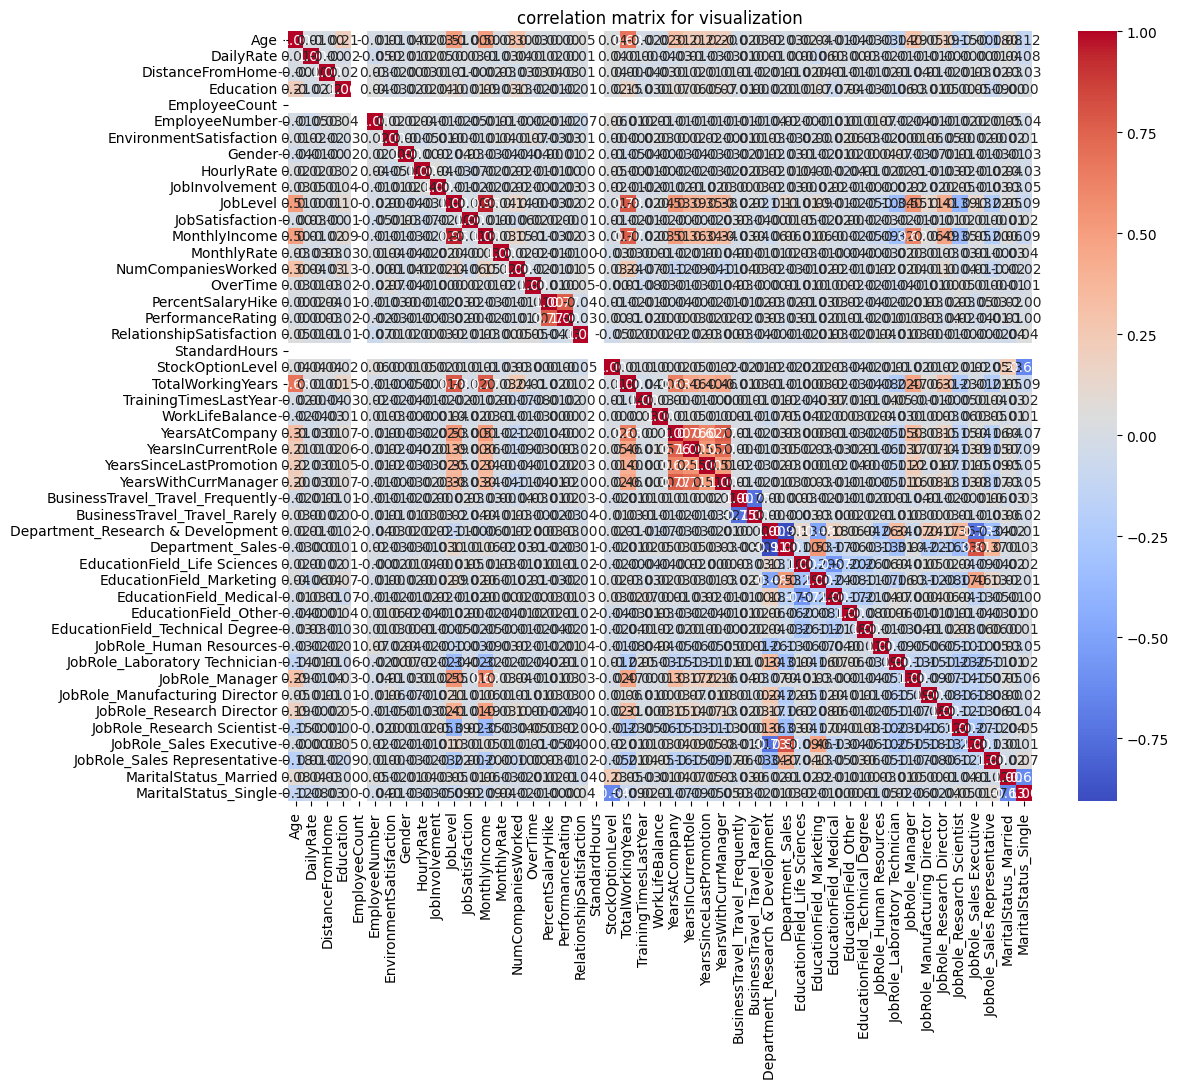

top 20 columns that is the most correlated with the target variable:
Index(['OverTime', 'MaritalStatus_Single', 'TotalWorkingYears', 'JobLevel',
       'YearsInCurrentRole', 'MonthlyIncome', 'Age',
       'JobRole_Sales Representative', 'YearsWithCurrManager',
       'StockOptionLevel', 'YearsAtCompany', 'JobInvolvement',
       'BusinessTravel_Travel_Frequently', 'JobSatisfaction',
       'EnvironmentSatisfaction', 'JobRole_Laboratory Technician',
       'MaritalStatus_Married', 'JobRole_Research Director',
       'Department_Research & Development', 'JobRole_Manager'],
      dtype='object')


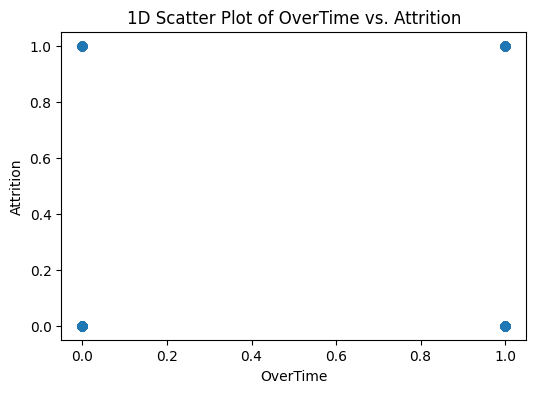

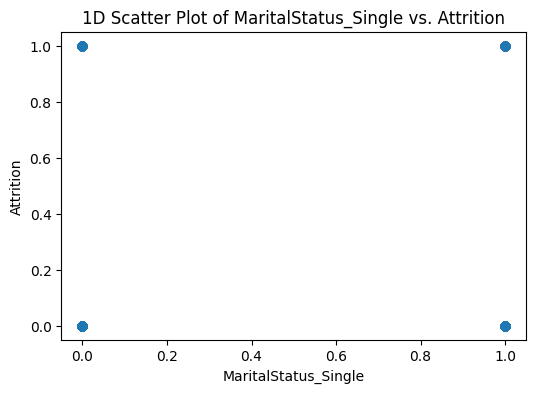

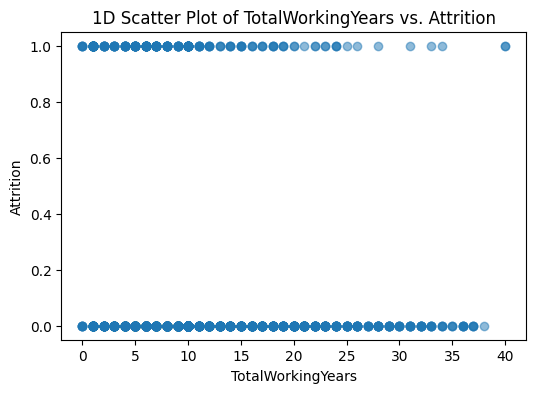

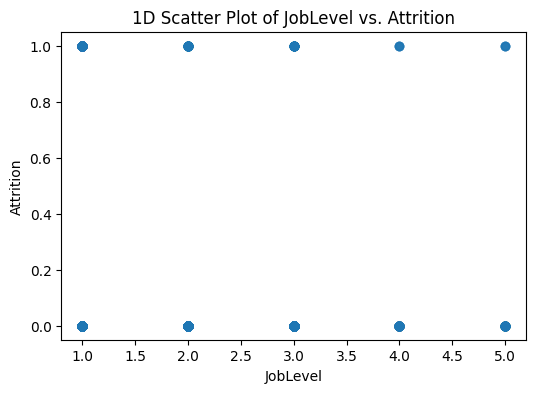

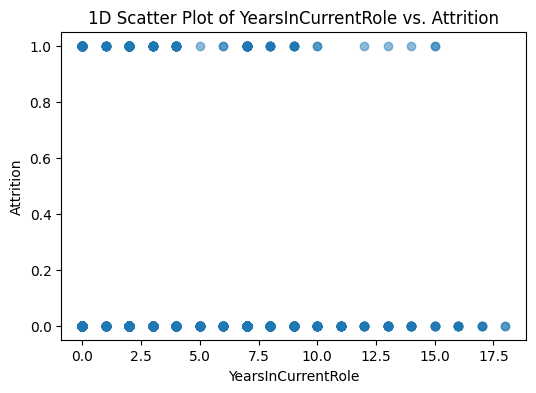

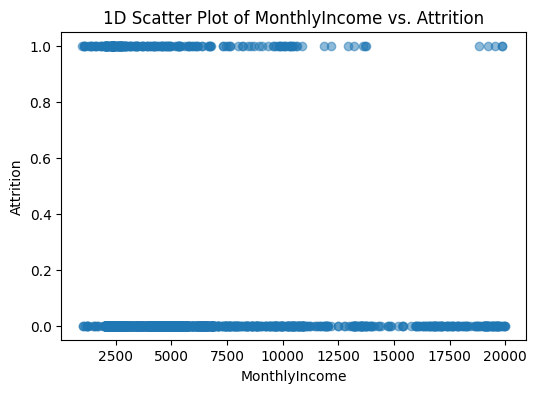

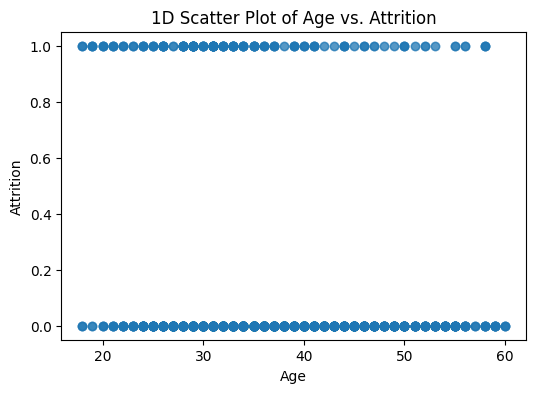

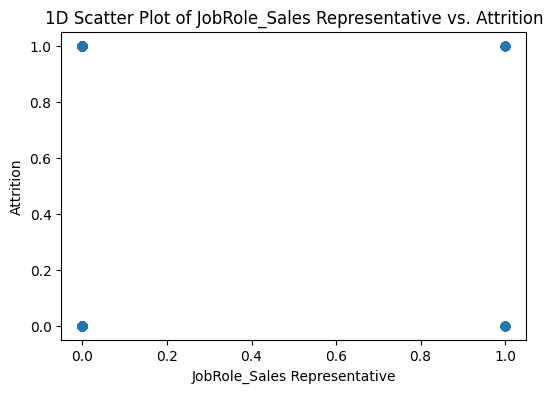

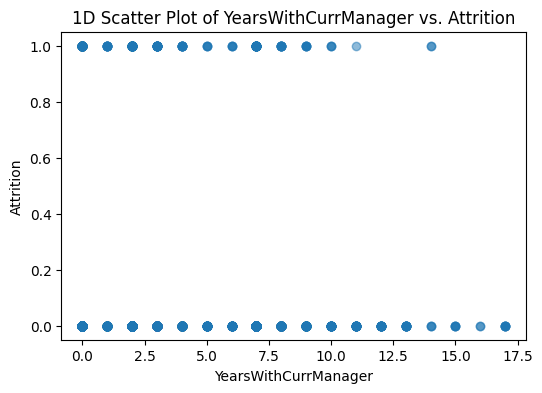

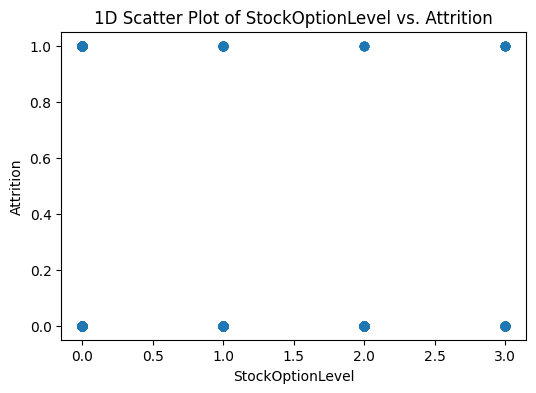

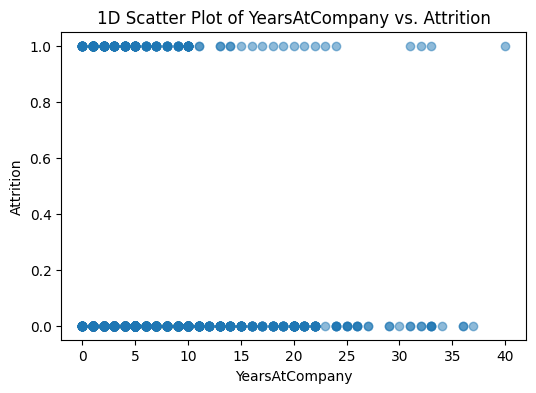

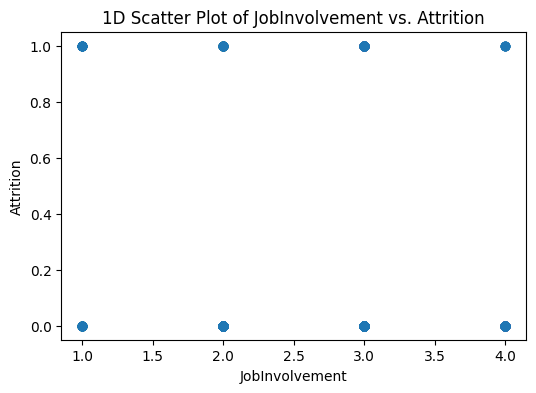

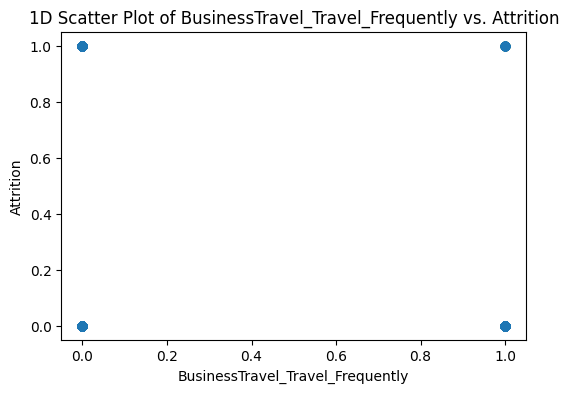

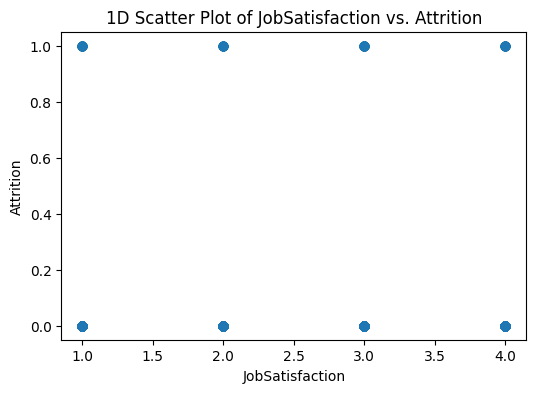

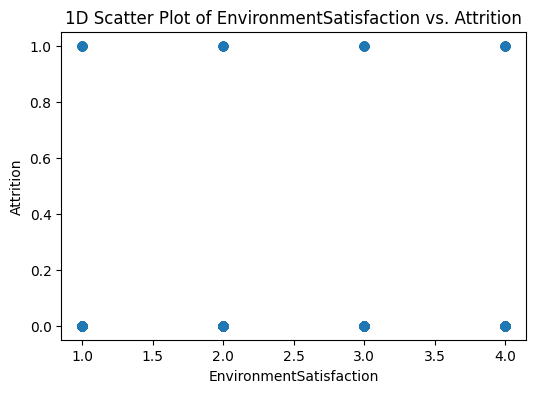

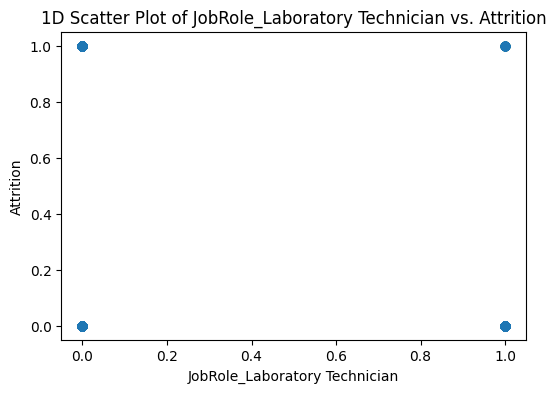

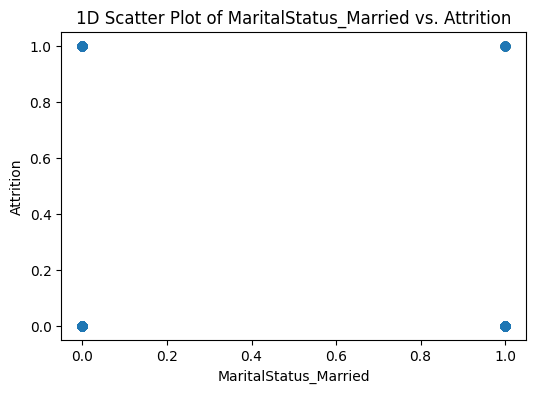

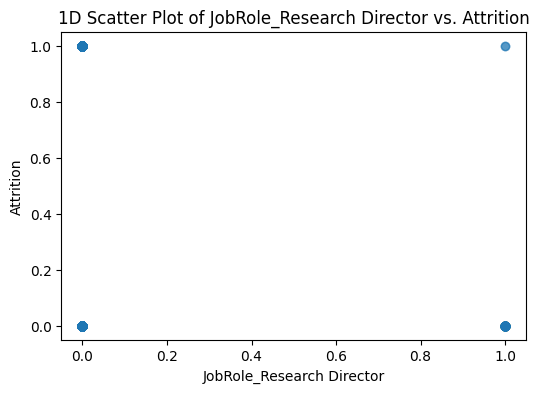

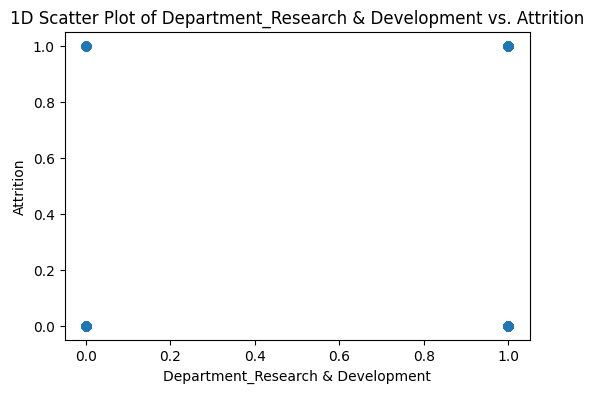

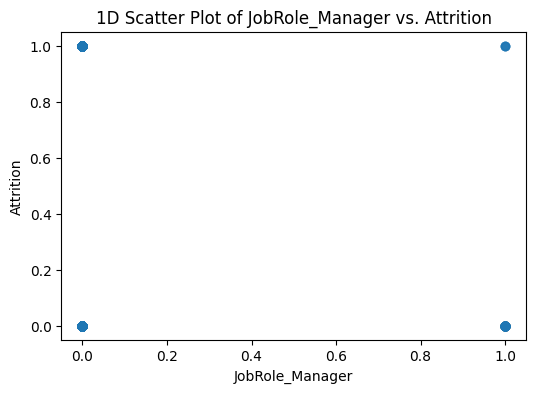

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# step 1
# calculating correlation of each feature with the target column
CorrelationWithTarget = Features.corrwith(Labels)

# step 2
# displaying the correlation of each feature with the target
print("correlation of each feature with the target variable:")
print(CorrelationWithTarget)

# step 3
# creating a correlation matrix and visualize it using a heatmap
CorrelationMatrix = Features.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(CorrelationMatrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title("correlation matrix for visualization")
plt.show()

# step 4
# selecting the top 20 columns that have the highest correlation with the target variable
Top20Features = CorrelationWithTarget.abs().sort_values(ascending=False).head(20).index
print(f"top 20 columns that is the most correlated with the target variable:\n{Top20Features}")

# creating 1D scatter plots for the top 20 features
for feature in Top20Features:
    plt.figure(figsize=(6, 4))
    plt.scatter(Features[feature], Labels, alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel('Attrition')
    plt.title(f'1D Scatter Plot of {feature} vs. Attrition')
    plt.show()

In [9]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
 
# spliting the data into training and testing sets
Features_train, Features_test, Labels_train, Labels_test = train_test_split(Features, Labels, test_size=0.2, random_state=42)

# initializing the logistic regression classifier
clf = LogisticRegression()

# train the classifier on the training data
clf.fit(Features_train, Labels_train)

# make predictions on the test set
Labels_pred = clf.predict(Features_test)

# evaluating the classifiers performance
accuracy = accuracy_score(Labels_test, Labels_pred)
print(f"accuracy of logistic regression classifier: {accuracy:.2f}")


accuracy of logistic regression classifier: 0.87


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
